In [1]:
import net3d_v10_8 as n3
import net3d_v10_8_no_crossing as n3n
import gln_v5 as gln
import functions as fc

import json
jlo = lambda s: json.load(open(s,'r'))
%pylab inline
%config InlineBackend.figure_format = 'retina'
from itertools import combinations
import seaborn as sns
import networkx as nx
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# run simulations

In [ ]:
Adj = fc.gen_ER(100, 0.06)
json.dump(Adj, open('./adj_er_k6.json','w'))

Adj = fc.generate_ba_model(100,3,m0=3)
json.dump(Adj, open('./adj_ba_k6.json','w'))

In [ ]:
import os,sys

for j in range(50):
    os.system("""python ./er_all.py %d """%j )
    
for j in range(50):
    os.system("""python ./ba_all.py %d """%j )
    
for j in range(50):
    os.system("""python ./er_all.py %d """%j )
    
for j in range(50):
    os.system("""python ./gln_flavor_all.py %d """%j )

# analysis

In [2]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

In [2]:
ngln = []
el = []
with open('./ngln_er_n100_k6.txt','r') as f:
    for line in f:
        ngln.append(float(line.strip()))
with open('./elastic_er_n100_k6.txt','r') as f:
    for line in f:
        el.append(float(line.strip()))

In [14]:
data = zip(ngln,el)

In [15]:
df = pd.DataFrame(data, columns=["$\\mathcal{G}_n$", "elastic energy"])

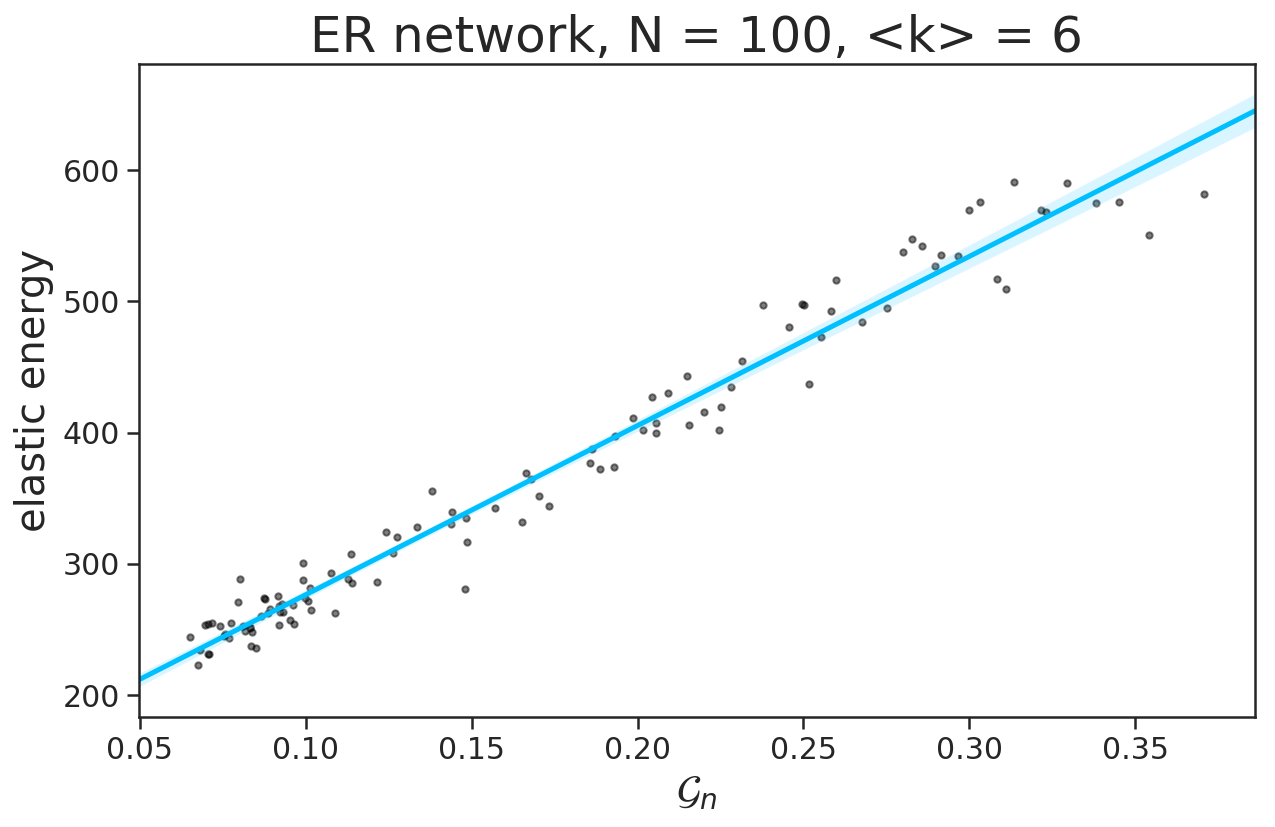

In [8]:
figure(figsize=(10,6))
sns.set(style="ticks")
b=sns.regplot(x="$\\mathcal{G}_n$", y="elastic energy", data=df, scatter_kws={'s':10,'color':'black','alpha':0.5},line_kws={'linewidth':2.5, 'color':'deepskyblue'})
b.set_xlabel("$\\mathcal{G}_n$",fontsize=20)
b.set_ylabel("elastic energy",fontsize=20)
b.tick_params(labelsize=15)
b.axes.set_title("ER network, N = 100, <k> = 6",fontsize=25)
savefig('./energy_vs_ngln_er.svg')

In [13]:
ngln = []
el = []
with open('./ngln_3dlattice_n100.txt','r') as f:
    for line in f:
        ngln.append(float(line.strip()))
with open('./elastic_3dlattice_n100.txt','r') as f:
    for line in f:
        el.append(float(line.strip()))

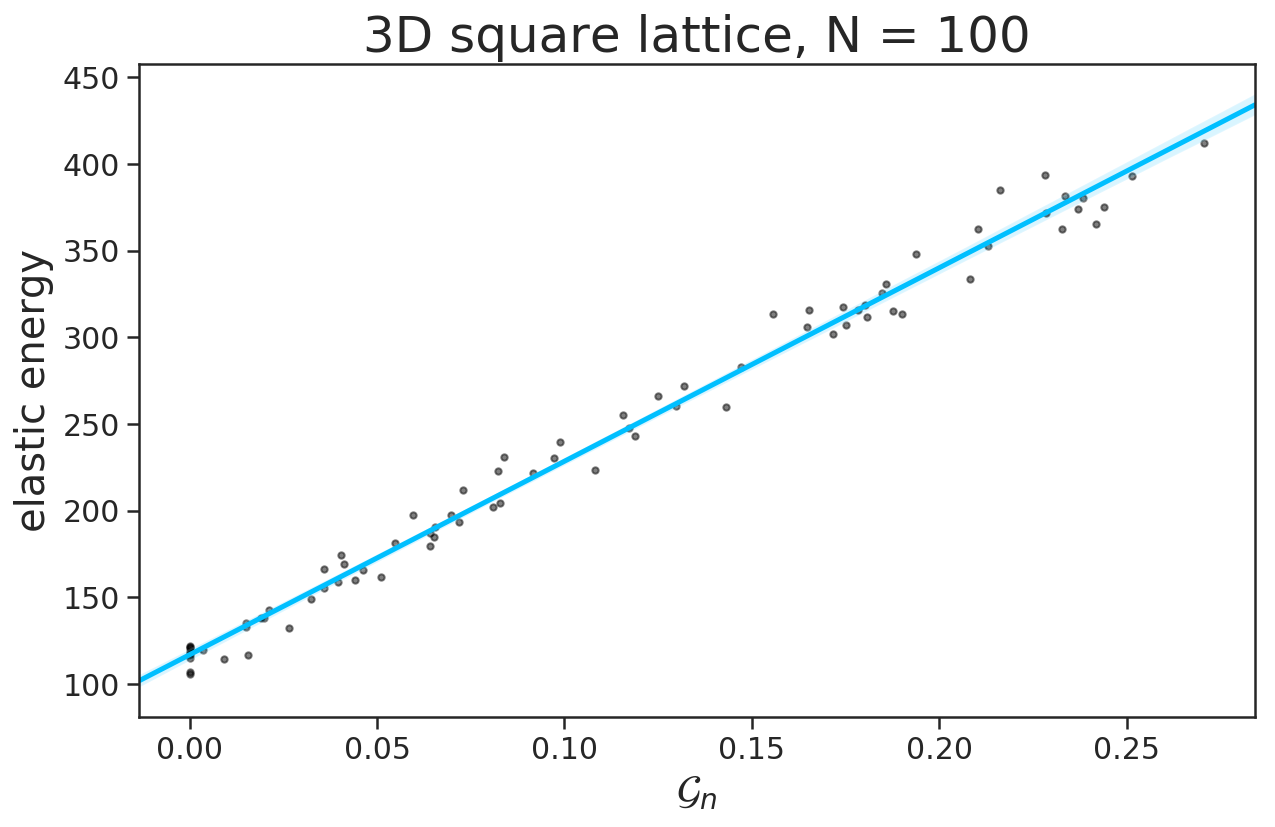

In [16]:
figure(figsize=(10,6))
sns.set(style="ticks")
b=sns.regplot(x="$\\mathcal{G}_n$", y="elastic energy", data=df, scatter_kws={'s':10,'color':'black','alpha':0.5},line_kws={'linewidth':2.5, 'color':'deepskyblue'})
b.set_xlabel("$\\mathcal{G}_n$",fontsize=20)
b.set_ylabel("elastic energy",fontsize=20)
b.tick_params(labelsize=15)
b.axes.set_title("3D square lattice, N = 100",fontsize=25)
savefig('./energy_vs_ngln_3dlattice.svg')

In [9]:
ngln = []
el = []
with open('./ngln_ba_n100_k6.txt','r') as f:
    for line in f:
        ngln.append(float(line.strip()))
with open('./elastic_ba_n100_k6.txt','r') as f:
    for line in f:
        el.append(float(line.strip()))

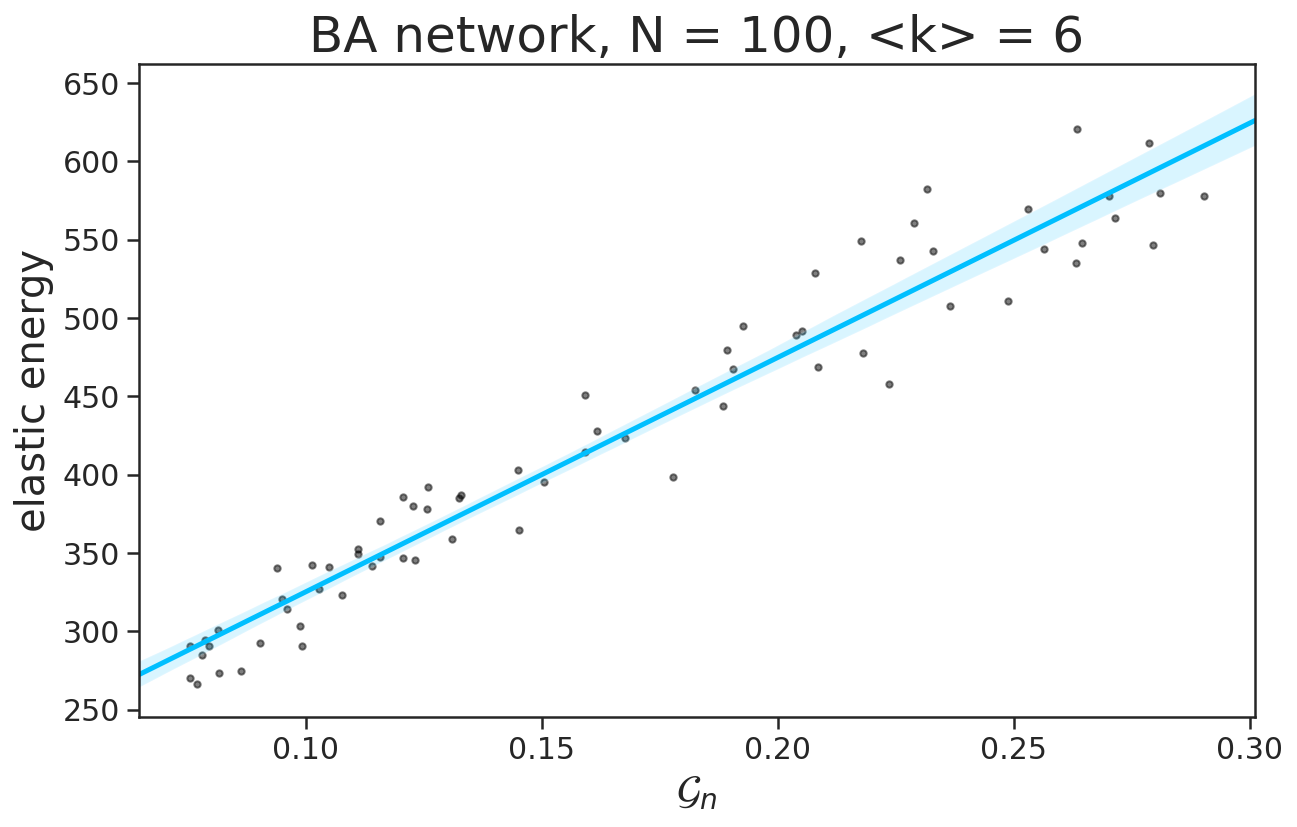

In [12]:
figure(figsize=(10,6))
sns.set(style="ticks")
b=sns.regplot(x="$\\mathcal{G}_n$", y="elastic energy", data=df, scatter_kws={'s':10,'color':'black','alpha':0.5},line_kws={'linewidth':2.5, 'color':'deepskyblue'})
b.set_xlabel("$\\mathcal{G}_n$",fontsize=20)
b.set_ylabel("elastic energy",fontsize=20)
b.tick_params(labelsize=15)
b.axes.set_title("BA network, N = 100, <k> = 6",fontsize=25)
savefig('./energy_vs_ngln_ba.svg')

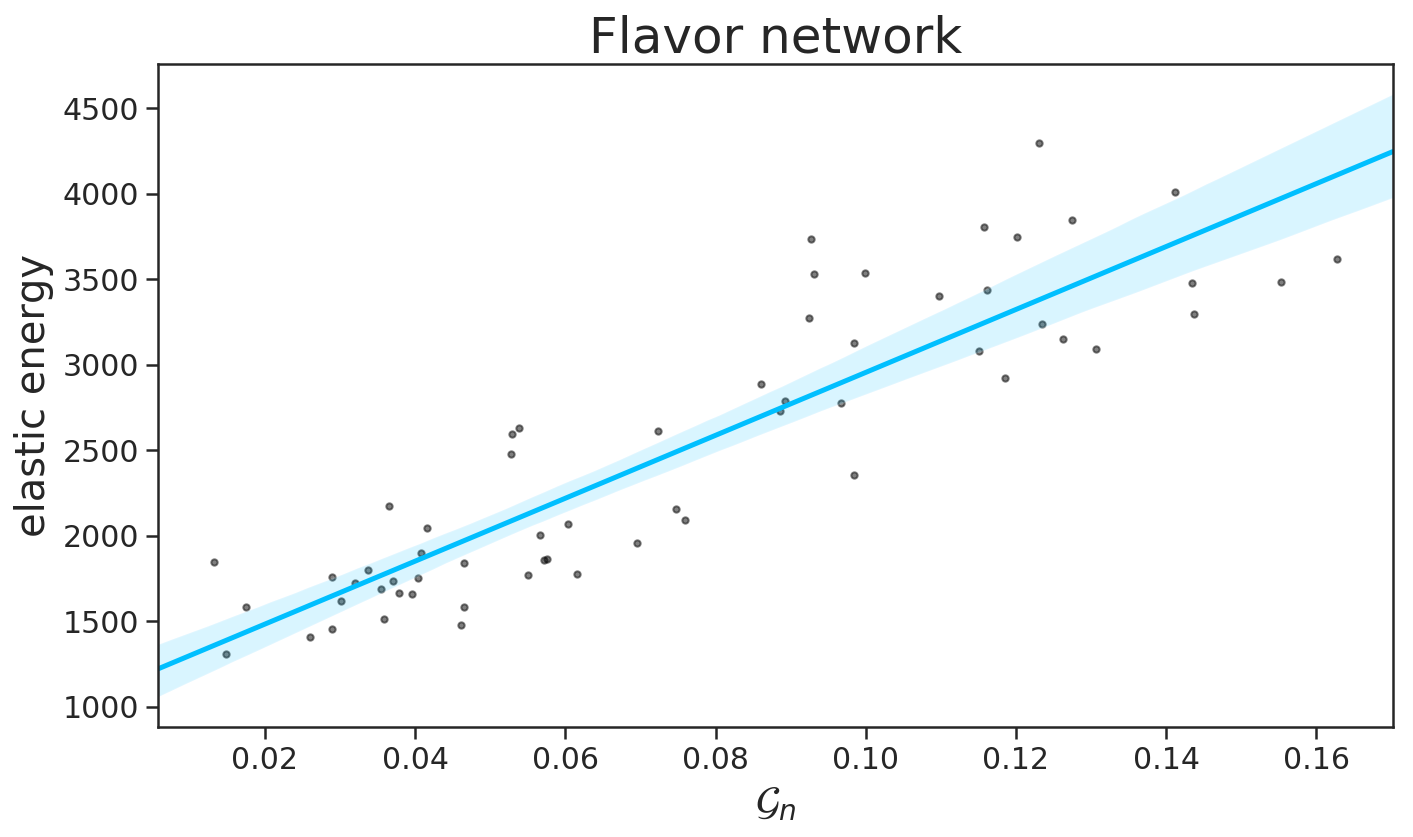

In [21]:
ngln = []
el = []
with open('./ngln_flavor.txt','r') as f:
    for line in f:
        ngln.append(float(line.strip()))
with open('./elastic_flavor.txt','r') as f:
    for line in f:
        el.append(float(line.strip()))

data = zip(ngln,el)
df = pd.DataFrame(data, columns=["$\\mathcal{G}_n$", "elastic energy"])
        
figure(figsize=(10,6))
sns.set(style="ticks")
b=sns.regplot(x="$\\mathcal{G}_n$", y="elastic energy", data=df,ci=95, scatter_kws={'s':10,'color':'black','alpha':0.5},line_kws={'linewidth':2.5, 'color':'deepskyblue'})
b.set_xlabel("$\\mathcal{G}_n$",fontsize=20)
b.set_ylabel("elastic energy",fontsize=20)
b.tick_params(labelsize=15)
b.axes.set_title("Flavor network",fontsize=25)
tight_layout()
savefig('./energy_vs_ngln_flavor.svg')
# savefig('./energy_vs_ngln_flavor.png',dpi=300)